## La fiebre de los videojuegos!

En este proyecto analizaremos un data set de videojuegos que nos ayudará a identificar y obtener reultados con respecto a los patrones  que determinen si un juego tiene éxito o no. Gracias a estos resultados sabremos sin un futuro proyectos prometedores y como planificar campañas publicitarias.

## Paso 1. Inicialización

In [1]:
# Cargar la librerías correspondientes.
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### Cargar datos

Abrir el archivo de datos y estudiar la información general

In [2]:
df_games = pd.read_csv('games.csv')

## Paso 2. Prepara los datos.

Visualización de los datos para asegurarnos que cargaron correctamente y como están elaboradas

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10877,Blitz: Overtime,PSP,2006.0,Sports,0.09,0.00,0.00,0.01,NaN,7.5,M
13347,Need for Speed Underground,PC,2003.0,Racing,0.00,0.04,0.00,0.01,82.0,8.3,E
14657,DICE: DNA Integrated Cybernetic Enterprises,PS2,2005.0,Shooter,0.01,0.01,0.00,0.00,48.0,tbd,E10+
7101,Valhalla Knights 2,PSP,2008.0,Role-Playing,0.09,0.00,0.12,0.01,50.0,5.4,E10+
5901,Dance Dance Revolution Universe 3,X360,2008.0,Simulation,0.28,0.00,0.00,0.02,65.0,7.7,E
6487,WWE 2K17,XOne,2016.0,Sports,0.12,0.12,0.00,0.02,68.0,5.5,T
2553,SingStar Vol. 2,PS3,2008.0,Misc,0.29,0.39,0.00,0.12,76.0,tbd,T
12923,New Prince of Tennis: Go to the Top,3DS,2015.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
11730,Tales of Fandom Vol.2,PS2,2007.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
6094,Battlefield: Hardline,X360,2015.0,Shooter,0.17,0.09,0.00,0.03,NaN,4.1,M


De primera instancia observamos que las columnas no están en el formato adecuado por lo que hay que cambiar las columnas a minúsculas y los valores de la columna del año de lanzamiento deberían estar en formato `int`, este aspecto los cambiaremos más adelante.

In [5]:
df_games.columns = df_games.columns.str.lower()

#### Obresvamos la información general de la tabla.

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


La tabla cuenta con una dimensión de 16 715 filas x 11 columnas; eL data ES algo chico, no tan grande. De la cual, 6 columnas cuentan con valores nulos. Las columnas son `name`, `year_of_release`, `genre`, `critic_score`, `user_score` & `rating`. Los tipos de valores que se encuentran en el dataset son de tipo `object` (5 columnas) & `float64` (6 columnas).

Observaremos si es posible llenar los valores nulos.

#### Sustuir valores nulos.

Veremos si se pueden sustuir lso valores nulos con algún valor de tipo `object` o `float64`. La columnas `name` y `genre` son la únicas columnas con valores de tipo `object` que tienen valores nulos. En la columna `name`, difícilmente podríamos saber el nombre los nombres ausentes de los 2 videojuegos, podríamos quitar o no estos datos ya que solo corresponden el 0.00011 % del dataset. Decidimos no retirarlos y proporcionarles el nombre `Unknown`. Caso parecido a la columna `genre`, solo hay dos videjuegos que no tienen declarado su género, si no es uno de los viejuegos desconocidos, podríamos hacer una búsqueda de esos 2 juegos para saber de que género son, de lo contrario, proprocionarles el nombre de `Unknown`. En las columnas restantes es importante decidir si vamos a utilizar la `media`, la `mediana` para llenar los valores nulos, para deicidir este aspecto observaremos tanto la `media` como `mediana` con la descrición estadística general. O simplemente dejarlos vacíos.

Los datos probalemente están vacíos por tres posibles factores:

- El usuario no proporciono esa información.
- El adminitrador de llevar la base de datos no lleno esos valores.
- De borraron inportunamente.

In [7]:
df_games['name'] = df_games['name'].fillna('Unkown')
df_games.query("name == 'Unkown'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unkown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unkown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Tuvimos como resultado que el videjuego desconocido es el que tiene el género con valor nulo.

#### Descripción estadística.

In [8]:
# Observación de la información general estadística. 
df_games.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16715,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11560,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


En la descripción estadística podemos observar varios resultados interesantes.

-   El videojuego que aparece con más frecuancia es `Need for Speed: Most Wanted`, fue el juego multiconsola más vendido durante el registro del año 2016.
-   La consola PS2 fue y sigue siendo una de las consolas más vendidas en la historia de las consolas de lo videojuegos.
-   Los jugadores prefieren los juegos de acción.
-   Es curioso que el valor que más frecuente en la columna `user_score` es `tbd` (To be determined) ¿Será que se les olvidó poner al calificación? Los podemos rellenar con la mediana o moda de los que si están calificados.
-   La valores de la columna `year_of_release` están como tipo `float 64`. No podemos cambiar los valores a `int64` por tener valors nulos. No los sustituiremos para no causar alguna clase de sesgo e infromación incorrecta.
-   Hay videjuegos registrados desde el año 1980.

#### Cambiar el valor tbd a cero.

In [9]:
user_score = df_games[~(df_games['user_score'] == 'tbd') & ~(df_games['user_score'].isnull())]['user_score']
user_score = user_score.astype('float64')
mean_user_score = user_score.mean()
median_user_score = user_score.median()
print(f"La media de la calificación de los jugadores es de {mean_user_score}")
print(f"La mediana de la calificación de los jugadores es de {median_user_score}\n")
print(user_score.describe())

La media de la calificación de los jugadores es de 7.125046113306983
La mediana de la calificación de los jugadores es de 7.5

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


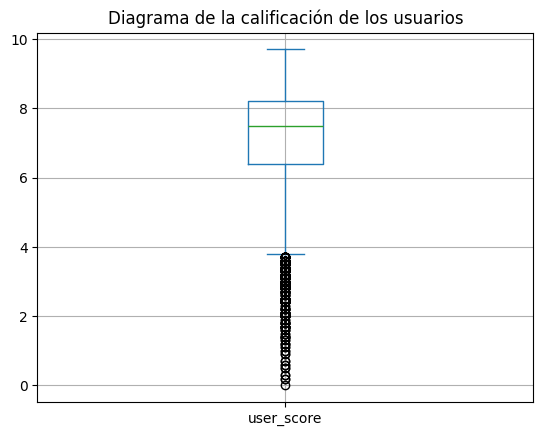

In [10]:
user_score.plot.box(title="Diagrama de la calificación de los usuarios")
plt.grid(True)
plt.show()

Tomaremos la mediana como función matemática para sustituir todos lo valores `tbd` y `NaN` ya que, como poder observar en el diagrama de cajas, tenemos valores atípicos. Igualmente en el diagrama observamos que el primer, segundo y tercer cuartil son 6.4, 7.5 y 8.2, respectivamente. Claro sin tomat los valores `tbs` y `NaN`.

In [11]:
df_games['user_score'] = df_games['user_score'].where(~((df_games['user_score'] == 'tbd') | (df_games['user_score'].isnull())),str(median_user_score))
df_games['user_score'] = df_games['user_score'].astype('float64')


In [12]:
df_games.describe()['user_score']

count    16715.00000
mean         7.32974
std          1.02785
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: user_score, dtype: float64

Observamos que al sustuir los valores `tbd` y `nan` la mayoría de loa datos se encuentran en 7.5, valor que calculamos como mediana.

#### Eliminiar las filas donde los valores `year_of_release` sean `Nan` y pasar los valores a `int64`

In [13]:
def delete_columns(data):
    index_nan_values = data[data['year_of_release'].isnull()].index
    data = data.drop(index=index_nan_values).reset_index(drop=True)
    data['year_of_release'] = data['year_of_release'].astype('int64')
    return data
    

In [14]:
df_games = delete_columns(df_games)

In [15]:
df_games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14706,Agatha Christie's The ABC Murders,PS4,2016,Adventure,0.01,0.01,0.00,0.00,67.0,6.2,T
4961,Ice Age: Dawn of the Dinosaurs,DS,2009,Action,0.20,0.15,0.00,0.04,54.0,7.5,E
13732,The Movies,PC,2005,Simulation,0.01,0.03,0.00,0.01,84.0,8.3,T
3534,Bolt,Wii,2008,Adventure,0.19,0.31,0.00,0.06,50.0,5.8,E10+
556,Killzone: Shadow Fall,PS4,2013,Shooter,0.89,1.33,0.08,0.39,73.0,6.8,M
9849,Smash Cars,PS2,2003,Racing,0.06,0.04,0.00,0.01,67.0,9.0,E
5064,Virtua Tennis 2009,Wii,2009,Sports,0.12,0.21,0.00,0.04,73.0,7.7,E
14179,Hallowed Legends: Samhain,PC,2011,Adventure,0.00,0.03,0.00,0.01,NaN,7.5,NaN
4770,Pro Evolution Soccer 2016,PS3,2015,Sports,0.09,0.12,0.15,0.04,NaN,7.2,E
4363,Super Robot Taisen OG: Original Generations,PS2,2007,Strategy,0.00,0.00,0.44,0.00,NaN,7.5,NaN


#### Ventas totales.

Calculae las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [16]:
def total_sales(row):
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    
    t_sales = na_sales + eu_sales + jp_sales + other_sales
    
    return t_sales

In [17]:
df_games['total_sales'] = df_games.apply(total_sales,axis=1)

In [18]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,7.5,NaN,0.01
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,7.5,NaN,0.01
